## Decision Tree - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Regression, decision tree'de entropy, information gain, gini gibi herhangi bir score uzerinden calismiyor; onun yerine varyanslar uzerinden calisiyor. Varyansin en dusuk old yere gore boluyor, tahmini de bolundugu yerdeki observationlarin ortalamasi uzerinden yapiyor.  

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Techproed DS/car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Target feature imiz Selling_Price, diger featurelardan aldigimiz bilgi ile Selling_Price'i tahmin edecek bir model kuracagiz. 

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


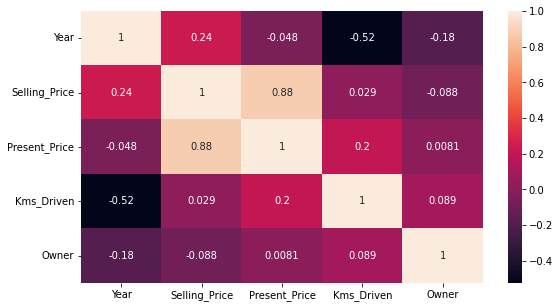

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df["vehicle_age"]=2022-df.Year

In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [12]:
df.drop(columns=["Car_Name", "Year"], inplace=True)  # year yerine yas i kullanicaz o yuzden dusuruyoruz. 

In [13]:
df=pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


## Train test split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [17]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [18]:
DT_model = DecisionTreeRegressor(random_state=101)

In [19]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [20]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [23]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


Train datamda hic hata yok, modelim cok iyi tahminde bulunmus fakat test datamda scorelar oyle gostermiyor, o yuzden burada bir overfitting old nu goruyoruz. 

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.881430
test_neg_mean_absolute_error       -0.828375
test_neg_mean_squared_error        -2.846157
test_neg_root_mean_squared_error   -1.606324
dtype: float64

## Features importance

In [25]:
DT_model.feature_importances_

array([8.97152719e-01, 1.76820219e-02, 0.00000000e+00, 8.10505631e-02,
       6.15555338e-04, 1.58965401e-03, 1.03684467e-04, 1.80580261e-03])

In [26]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Owner,0.000000
Seller_Type_Individual,0.000104
Fuel_Type_Diesel,0.000616
Fuel_Type_Petrol,0.001590
Transmission_Manual,0.001806
Kms_Driven,0.017682
vehicle_age,0.081051
Present_Price,0.897153


Feature importance, bize feature konusunda tam bir insight saglamaz. Biz best feature i dusurup score alma, kiyaslama yapmak icin buna bakiyoruz aslinda. Random forest'da ridge gibi calisirken, burada yani decision tree da lasso gibi calisiyor. 

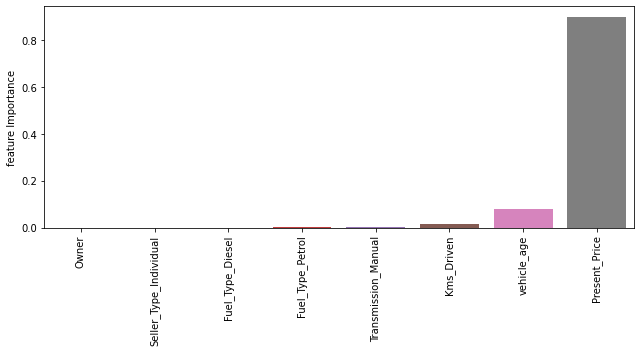

In [27]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

Hoca Present_Price i drop edip bakmis fakat scorelar cok kotulestigi icin bu notebook da digerinde old gibi buna yer vermemis. Biz normalde kendimiz bir calisma yaparken buna mutlaka bakacagiz. Cogu zaman da scorelar onemli feature dusuruldugunde kotu gelir, durumun iyilesme gostermesi cok rastlanan bir durum degil. 

## Visualizing trees

In [28]:
from sklearn.tree import plot_tree

Burada decision tree yi continious(numeric) verilerde nasil yapiyoruz, ona bakacagiz. 

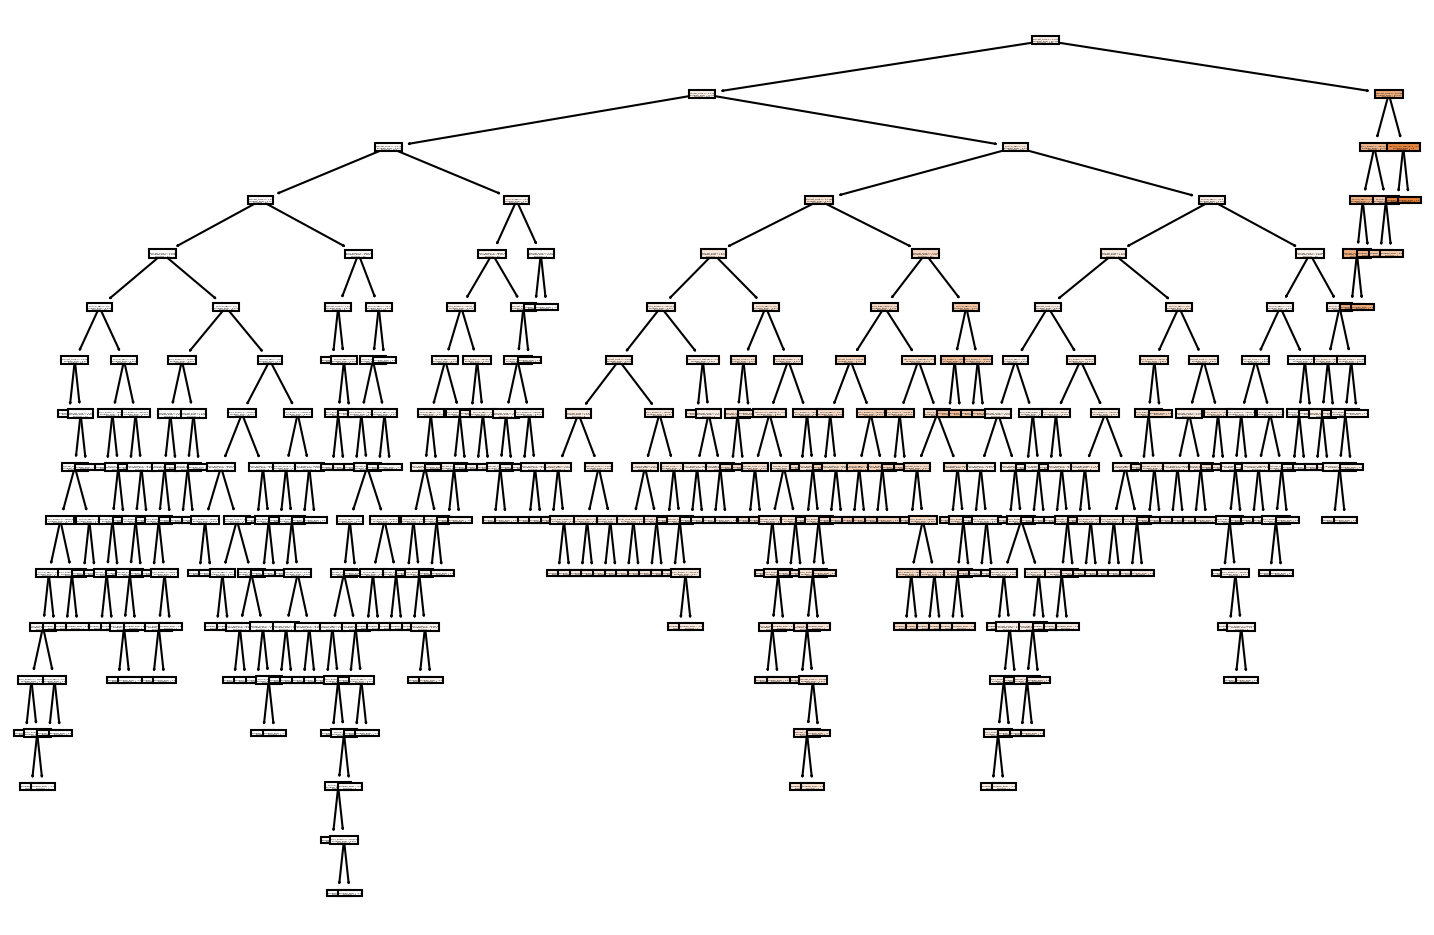

In [29]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);
plt.show()

In [30]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=10);

In [31]:
pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=101)



         train      test
R2    0.871127  0.783878
mae   1.105847  1.540649
mse   3.277820  5.800869
rmse  1.810475  2.408499




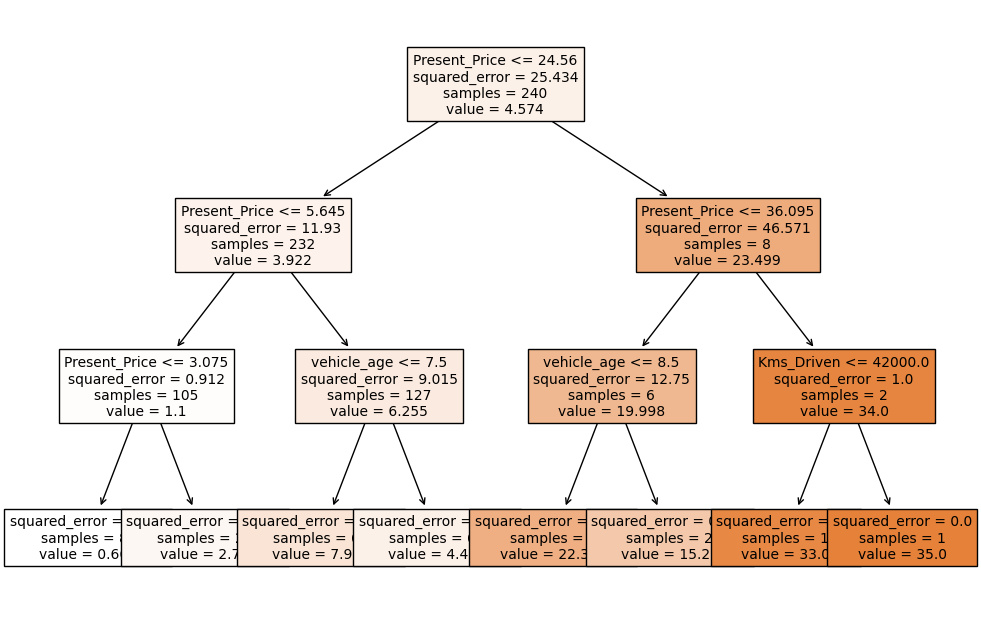

In [32]:
report_model(pruned_tree)
plt.show()


* Yukaridaki gorselestirilmis modelde regression ve clasification farkliligi olarak gini ya da entopy yerine 'squared error' degerinin oldnu goruyoruz. Bazi versiyonlarda bu 'mean squared error' olarak da yazabiliyor, ikisi ayni sey. 
* Yine semadaki value degeri, araba fiyatlarinin ortalamasini bize gosteriyor. 
* Ilk ayrima baktigimizda value lardan birinin dusuk bir degerken digerinin yuksek olmasindan, decision tree modelimin ilk once yuksek fiyatlilari ve dusuk fiyatlilari birbirinden ayirdigini goruyorum. 

## GridSearch

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = DecisionTreeRegressor(random_state=101)

In [35]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

# gridsearch ile teyiit ediyorz DT regression ile rmse değerleri uyumlu

In [36]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [37]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [38]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)

In [39]:
grid_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [40]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004507,0.000379,0.002794,0.001325,None,1,2,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.884873,-1.109968,-1.560195,-0.768519,-3.661578,-0.855804,-2.462645,-1.135945,-1.340881,-0.923418,-1.470383,0.869760,9
1,0.005718,0.001891,0.003384,0.002142,None,1,2,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.923490,-0.775427,-3.512334,-1.591926,-2.145708,-1.001497,-3.557253,-0.841655,-0.398649,-6.202618,-2.095056,1.733007,431
2,0.006682,0.003739,0.002741,0.001057,None,1,3,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.868025,-1.166010,-1.555224,-0.764768,-3.669531,-0.893783,-2.493841,-1.150770,-1.381815,-0.907673,-1.485144,0.871849,12
3,0.005111,0.002993,0.003550,0.002116,None,1,3,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.897430,-1.142804,-2.705761,-1.125360,-2.567831,-2.175479,-3.904847,-0.828821,-0.997053,-4.238386,-2.658377,1.817077,711
4,0.003972,0.000158,0.002318,0.000052,None,1,5,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.784587,-1.059755,-2.109169,-0.744268,-3.660894,-0.962344,-2.662130,-1.065130,-1.322418,-0.917490,-1.528818,0.922420,15
5,0.003629,0.000095,0.004981,0.003905,None,1,5,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.240390,-1.148949,-2.828630,-1.741955,-3.588684,-2.165832,-3.385514,-1.122575,-1.348627,-6.489925,-2.506108,1.591154,683
6,0.004465,0.001165,0.003128,0.002162,None,1,6,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.655147,-1.262552,-3.539843,-0.699470,-3.633202,-1.073780,-3.146107,-1.032690,-1.306700,-0.958924,-1.730842,1.141467,52
7,0.004695,0.001322,0.002908,0.001467,None,1,6,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.663536,-1.317728,-3.126575,-1.709144,-0.897274,-1.580253,-3.356449,-1.124097,-0.540088,-6.469341,-2.078449,1.721905,420
8,0.004024,0.000111,0.002340,0.000108,None,1,7,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.692478,-1.252800,-3.539136,-0.695838,-1.116187,-1.001527,-2.685655,-0.994064,-1.301957,-3.183532,-1.646317,1.011677,32
9,0.003682,0.000155,0.002830,0.001464,None,1,7,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-9.028223,-1.411968,-3.128591,-1.441484,-1.206118,-1.000492,-3.246923,-0.809372,-0.441792,-3.440157,-2.515512,2.403613,687


In [41]:
grid_model.best_index_

302

In [42]:
grid_model.best_score_  # neg rmse burasi

-1.4096661789372227

In [43]:
y_train_pred = grid_model.predict(X_train)

In [44]:
y_pred = grid_model.predict(X_test)

In [45]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


Bias eklemis olduk asagidaki hucrede eski degerleri goruyoruz. Su anda train ve test datamiz arasindaki oranlarda biraz daha uyum old nu goruyoruz. 

In [47]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101,max_depth = 6, min_samples_split= 7)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

#cv yapmaya gerek yok sadece karşılaştırmak için baktık

test_r2                             0.893220
test_neg_mean_absolute_error       -0.792517
test_neg_mean_squared_error        -2.818985
test_neg_root_mean_squared_error   -1.409666
dtype: float64

cv yi ayrica yapmaya gerek olmamasinin sebebi grid_model in zaten kendi icinde cv yapiyor olmasi. 

In [46]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [48]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [49]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
123,1.00,1.150000,-0.150000
161,0.45,0.525455,-0.075455
68,4.35,4.833333,-0.483333
196,0.17,0.234667,-0.064667
138,0.60,0.736000,-0.136000
84,3.49,3.402500,0.087500
50,14.90,19.998333,-5.098333
43,5.50,5.200833,0.299167
39,2.25,2.116667,0.133333
117,1.10,1.150000,-0.050000


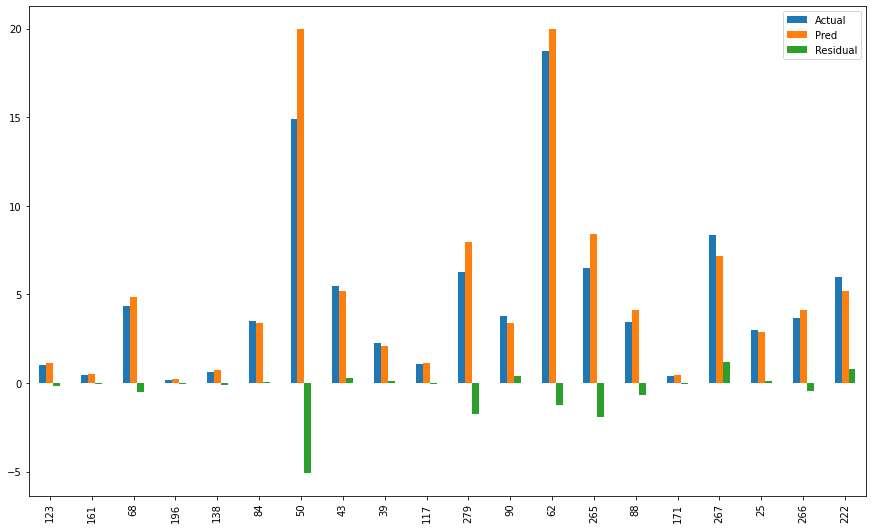

In [50]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()